<P> <img src="https://i.ibb.co/gyNf19D/nhslogo.png" alt="nhslogo" border="0" width="100" align="right"><font size="6"><b> CS4132 Data Analytics</b> </font>

# Lab 7.2: Data Exploration II (Multivariate Data)

Complete the following questions and upload your `.ipynb` file to Coursemology.

Name the file in the following format:

`Lab<Num><YourName>.ipynb`

## Q1

Manatees are large, gentle sea creatures that live along the Florida coast. Many manatees are killed or injured by powerboats. The data on powerboat registrations (in thousands) and the number of manatees killed by boats in Florida in the years 1977 to 1990 is given below:

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("Lab7iiQ1.csv")
df

,Year,Powerboat Registration,Manatees Killed
0,1977,447,13
1,1978,460,21
2,1979,481,24
3,1980,498,16
4,1981,513,24
5,1982,512,20
6,1983,526,15
7,1984,559,34
8,1985,585,33
9,1986,614,33


a) Draw a relevant scatterplot of these data.

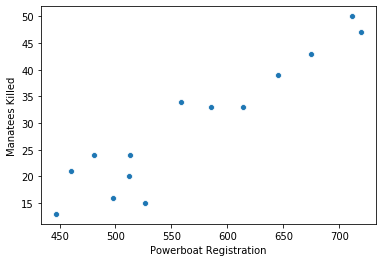

In [7]:
#your solution
sns.scatterplot(x='Powerboat Registration', y="Manatees Killed", data=df)

b) Find the correlation between number of powerboat registration and number of manatees killed. Conclude your findings.

In [6]:
#your solution
from scipy import stats
stats.pearsonr(df['Powerboat Registration'], df['Manatees Killed'])

(0.9414772887893059, 5.109061143429831e-07)

c) Describe your findings from (a) and (b).

#### Key your answer here
There is a very high correlation of 0.94 between powerboat registration and manatees killed. The p value is small so there is a strong certainty in the result. Therefore, the more powerboat there are registered, the more manatees killed.

d) Plot a regression line for on the scatterplot.

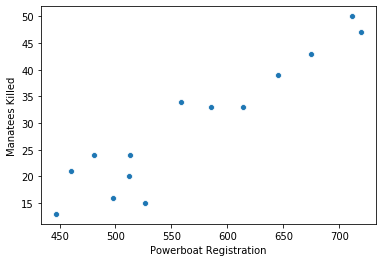

In [8]:
#your solution
sns.scatterplot(x='Powerboat Registration', y="Manatees Killed", data=df)

e) Create a pairplot for the data given.

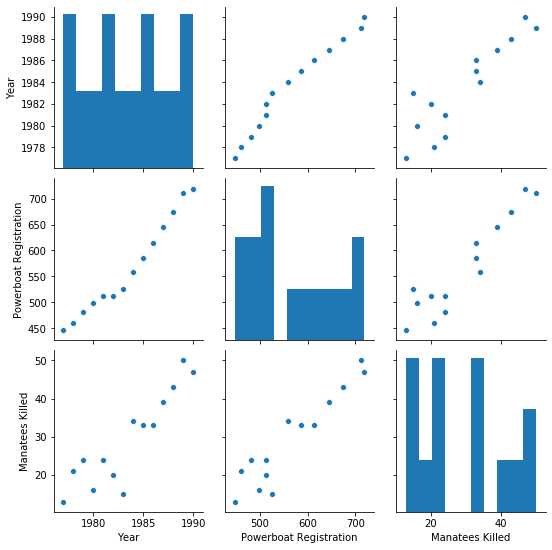

In [9]:
#your solution
sns.pairplot(df)

## Q2

In this question, we will use the World Happiness Report, which is a survey about the state of global happiness. The data is imported as follows:

In [13]:
import pandas as pd
import numpy as np
data = pd.read_csv('Lab7iiQ2.csv', index_col=0)
data.sort_values(['Year', "Happiness Score"], ascending=[True, False], inplace=True)
data.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
141,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
60,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
38,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
108,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
25,Canada,North America,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


a) Perform relevant EDA to answer the following question:

Which of the six variables ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity'] most affect a country’s “happiness”? Justify your answer.

In [24]:
#your solution
data2 = data.dropna()
corr = [[x, stats.pearsonr(data2['Happiness Score'], data2[x])[0]]
       for x in ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                 'Freedom', 'Trust (Government Corruption)', 'Generosity']]
# Economy has the greatest correlation with happiness at 0.785
# so it affects a countries happiness the most.
corr

[['Economy (GDP per Capita)', 0.7854496399427378],
 ['Family', 0.6365319619861456],
 ['Health (Life Expectancy)', 0.748040374093918],
 ['Freedom', 0.5603533893204006],
 ['Trust (Government Corruption)', 0.4063396549648013],
 ['Generosity', 0.16356161612806216]]

b) Find each factor's correlation with the overall happiness score. Store the data in a dataframe.

In [41]:
#your solution
ncorr = np.array(corr)
cd = pd.DataFrame(ncorr[:,1],index=ncorr[:,0],columns=['Correlation'])
cd

,Correlation
Economy (GDP per Capita),0.7854496399427378
Family,0.6365319619861456
Health (Life Expectancy),0.748040374093918
Freedom,0.5603533893204006
Trust (Government Corruption),0.4063396549648013
Generosity,0.16356161612806216


c) Plot a bar graph to visualize the data in b)

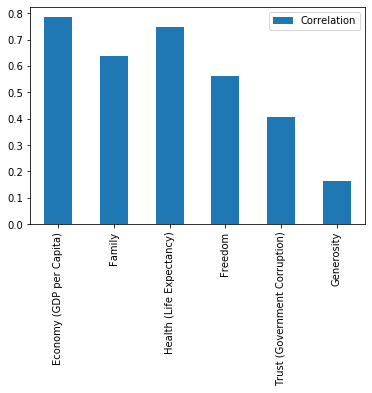

In [36]:
#your solution
cd['Correlation'] = cd['Correlation'].astype(float)
cd.plot(kind='bar')

d) You are to shortlist a question you wish to investigate (and not already covered above) using the data given.
Based on what you have learnt thus far, perform relevant EDA to help answer your question.
Hence, state your observations/conclusion.

(0.3449624842841045, 1.4018007197732533e-14)


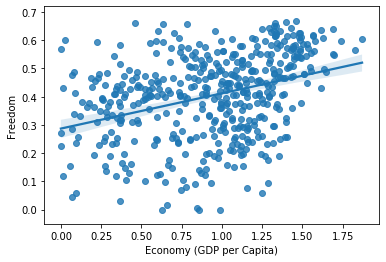

In [46]:
#your solution
# What is the correlation between GDP per Capita and Freedom?
print(stats.pearsonr(x=data2['Economy (GDP per Capita)'],
              y=data2['Freedom']))
sns.regplot(x='Economy (GDP per Capita)',y='Freedom',data=data2)

#### Key your observations/conclusion here
There is a low positive correlation between GDP per Capita and freedom. 

e) We discussed the pairplot in the notes. In contrast to the `sns.pairplot` function, `sns.PairGrid` is a class which means that it does not automatically fill in the plots for us. Instead, we create a class instance and then we map specific functions to the different sections of the grid. 

Read more about PairGrid and how to use it: https://seaborn.pydata.org/generated/seaborn.PairGrid.html

Plot a relevant PairGrid to visualize the data in this question.

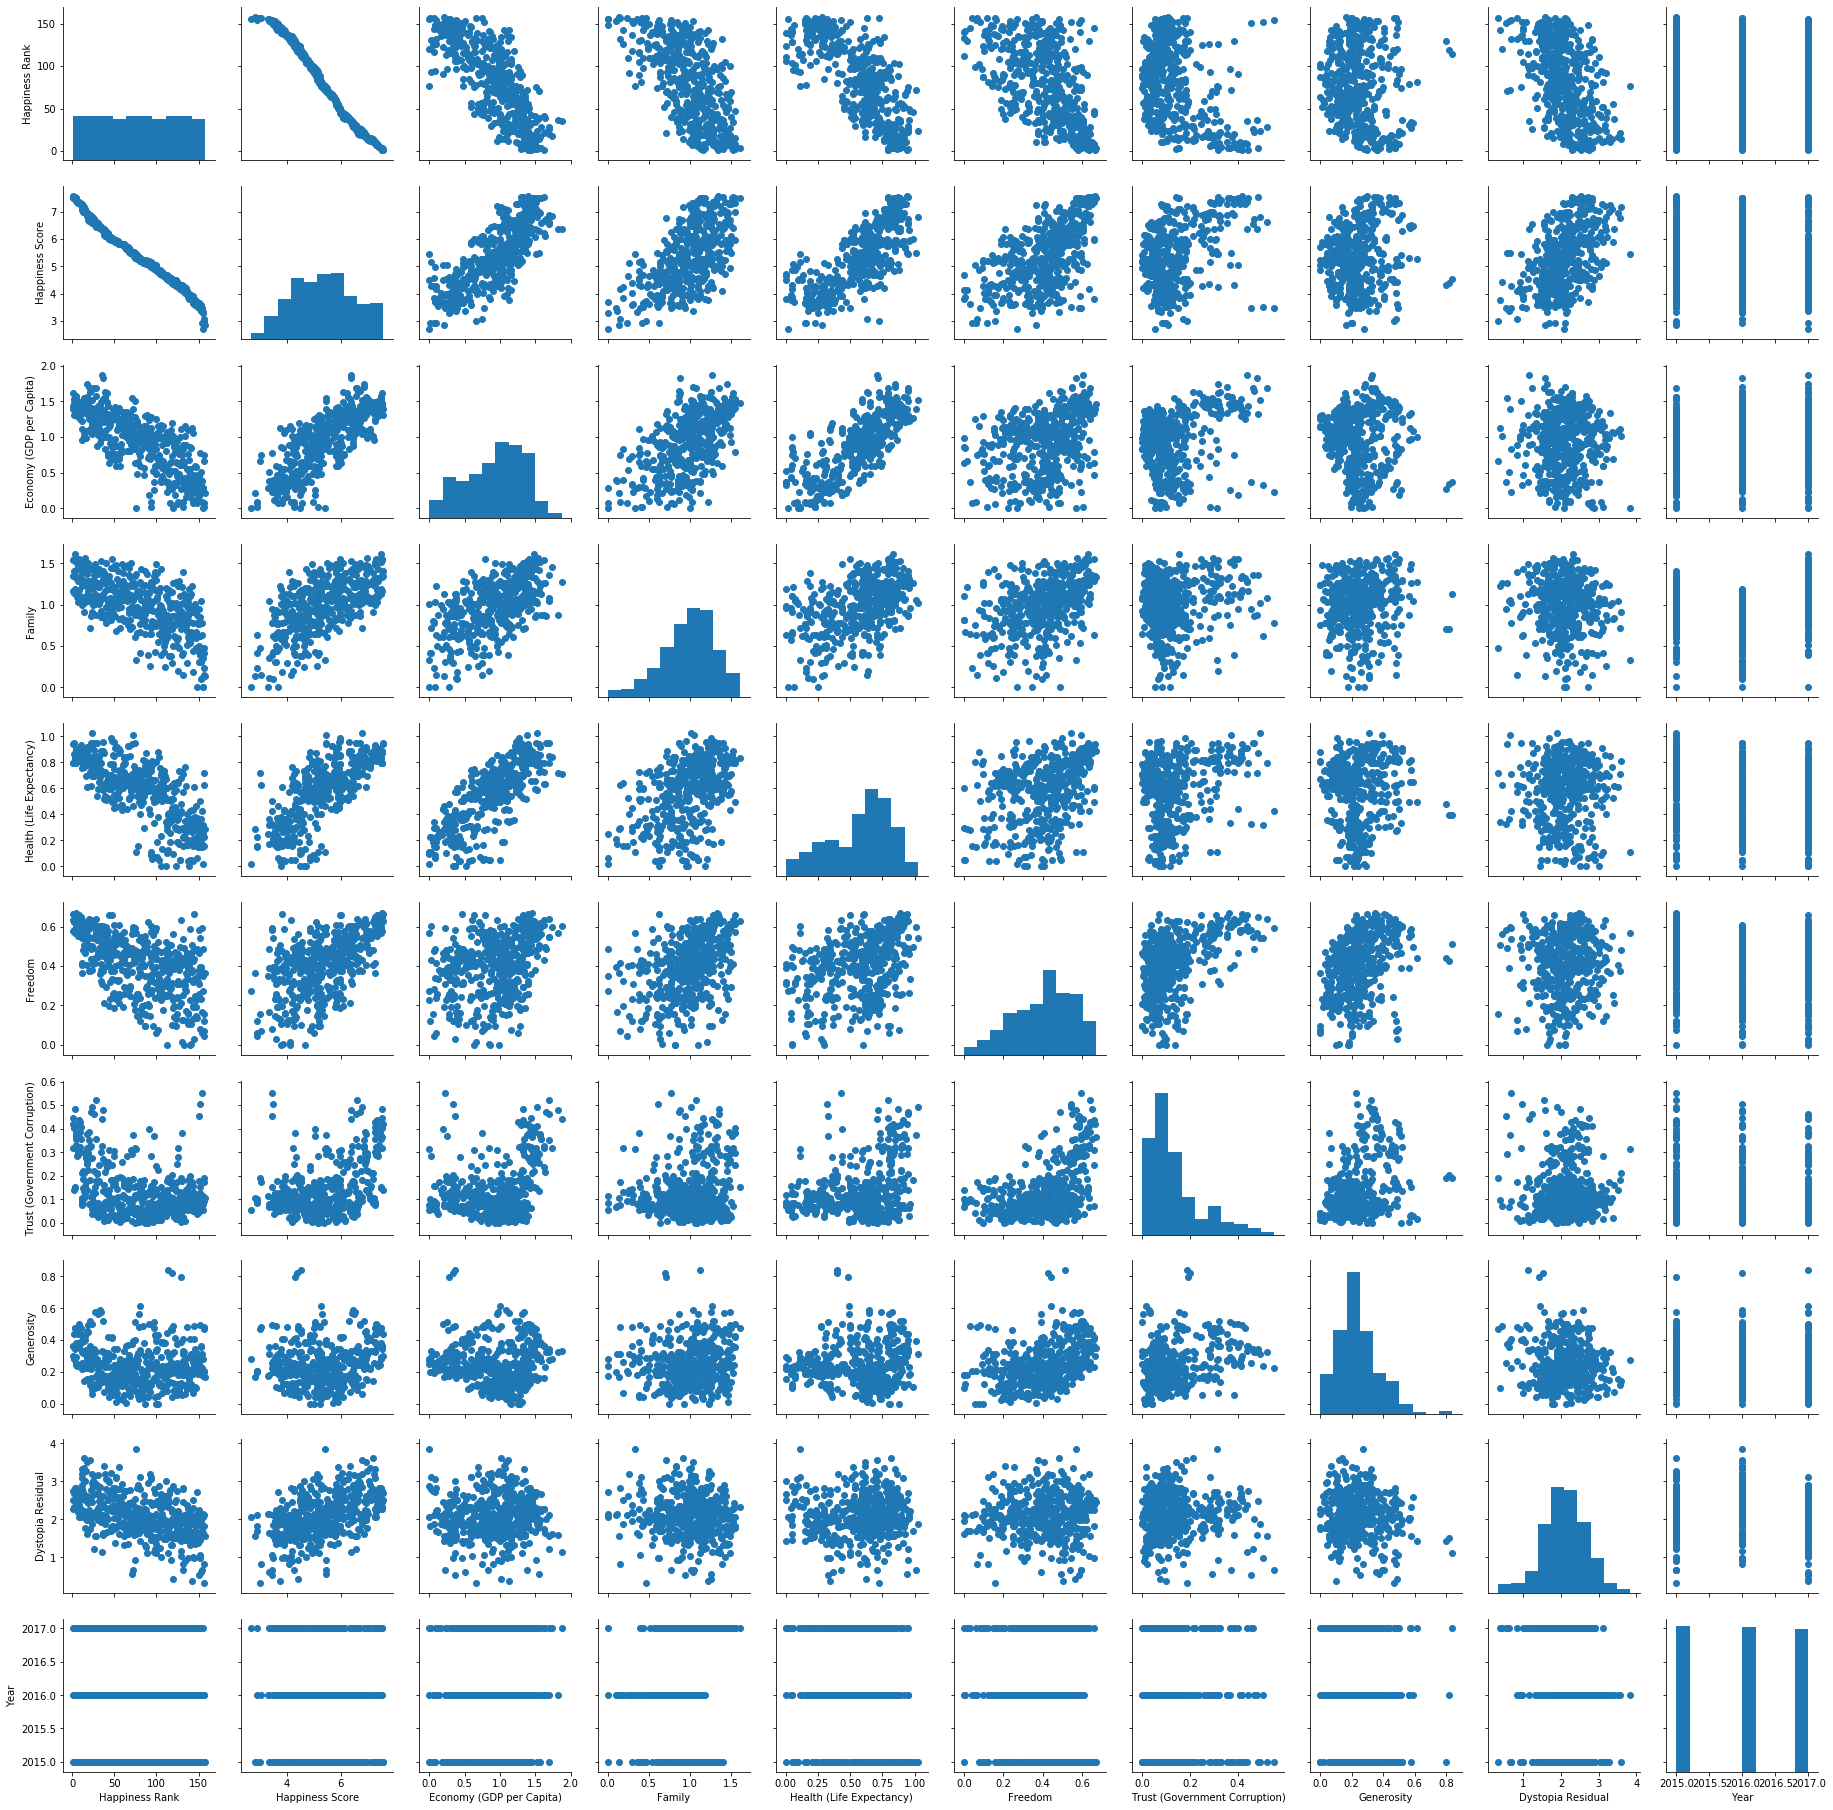

In [51]:
#your solution
import matplotlib.pyplot as plt
graph = sns.PairGrid(data2)
graph = graph.map_diag(plt.hist)
graph = graph.map_offdiag(plt.scatter)
plt.show()

Do some customization to the PairGrid such that the diagonal will display the respective 5-number summary instead the histogram.

AttributeError: module 'pandas' has no attribute 'describe'

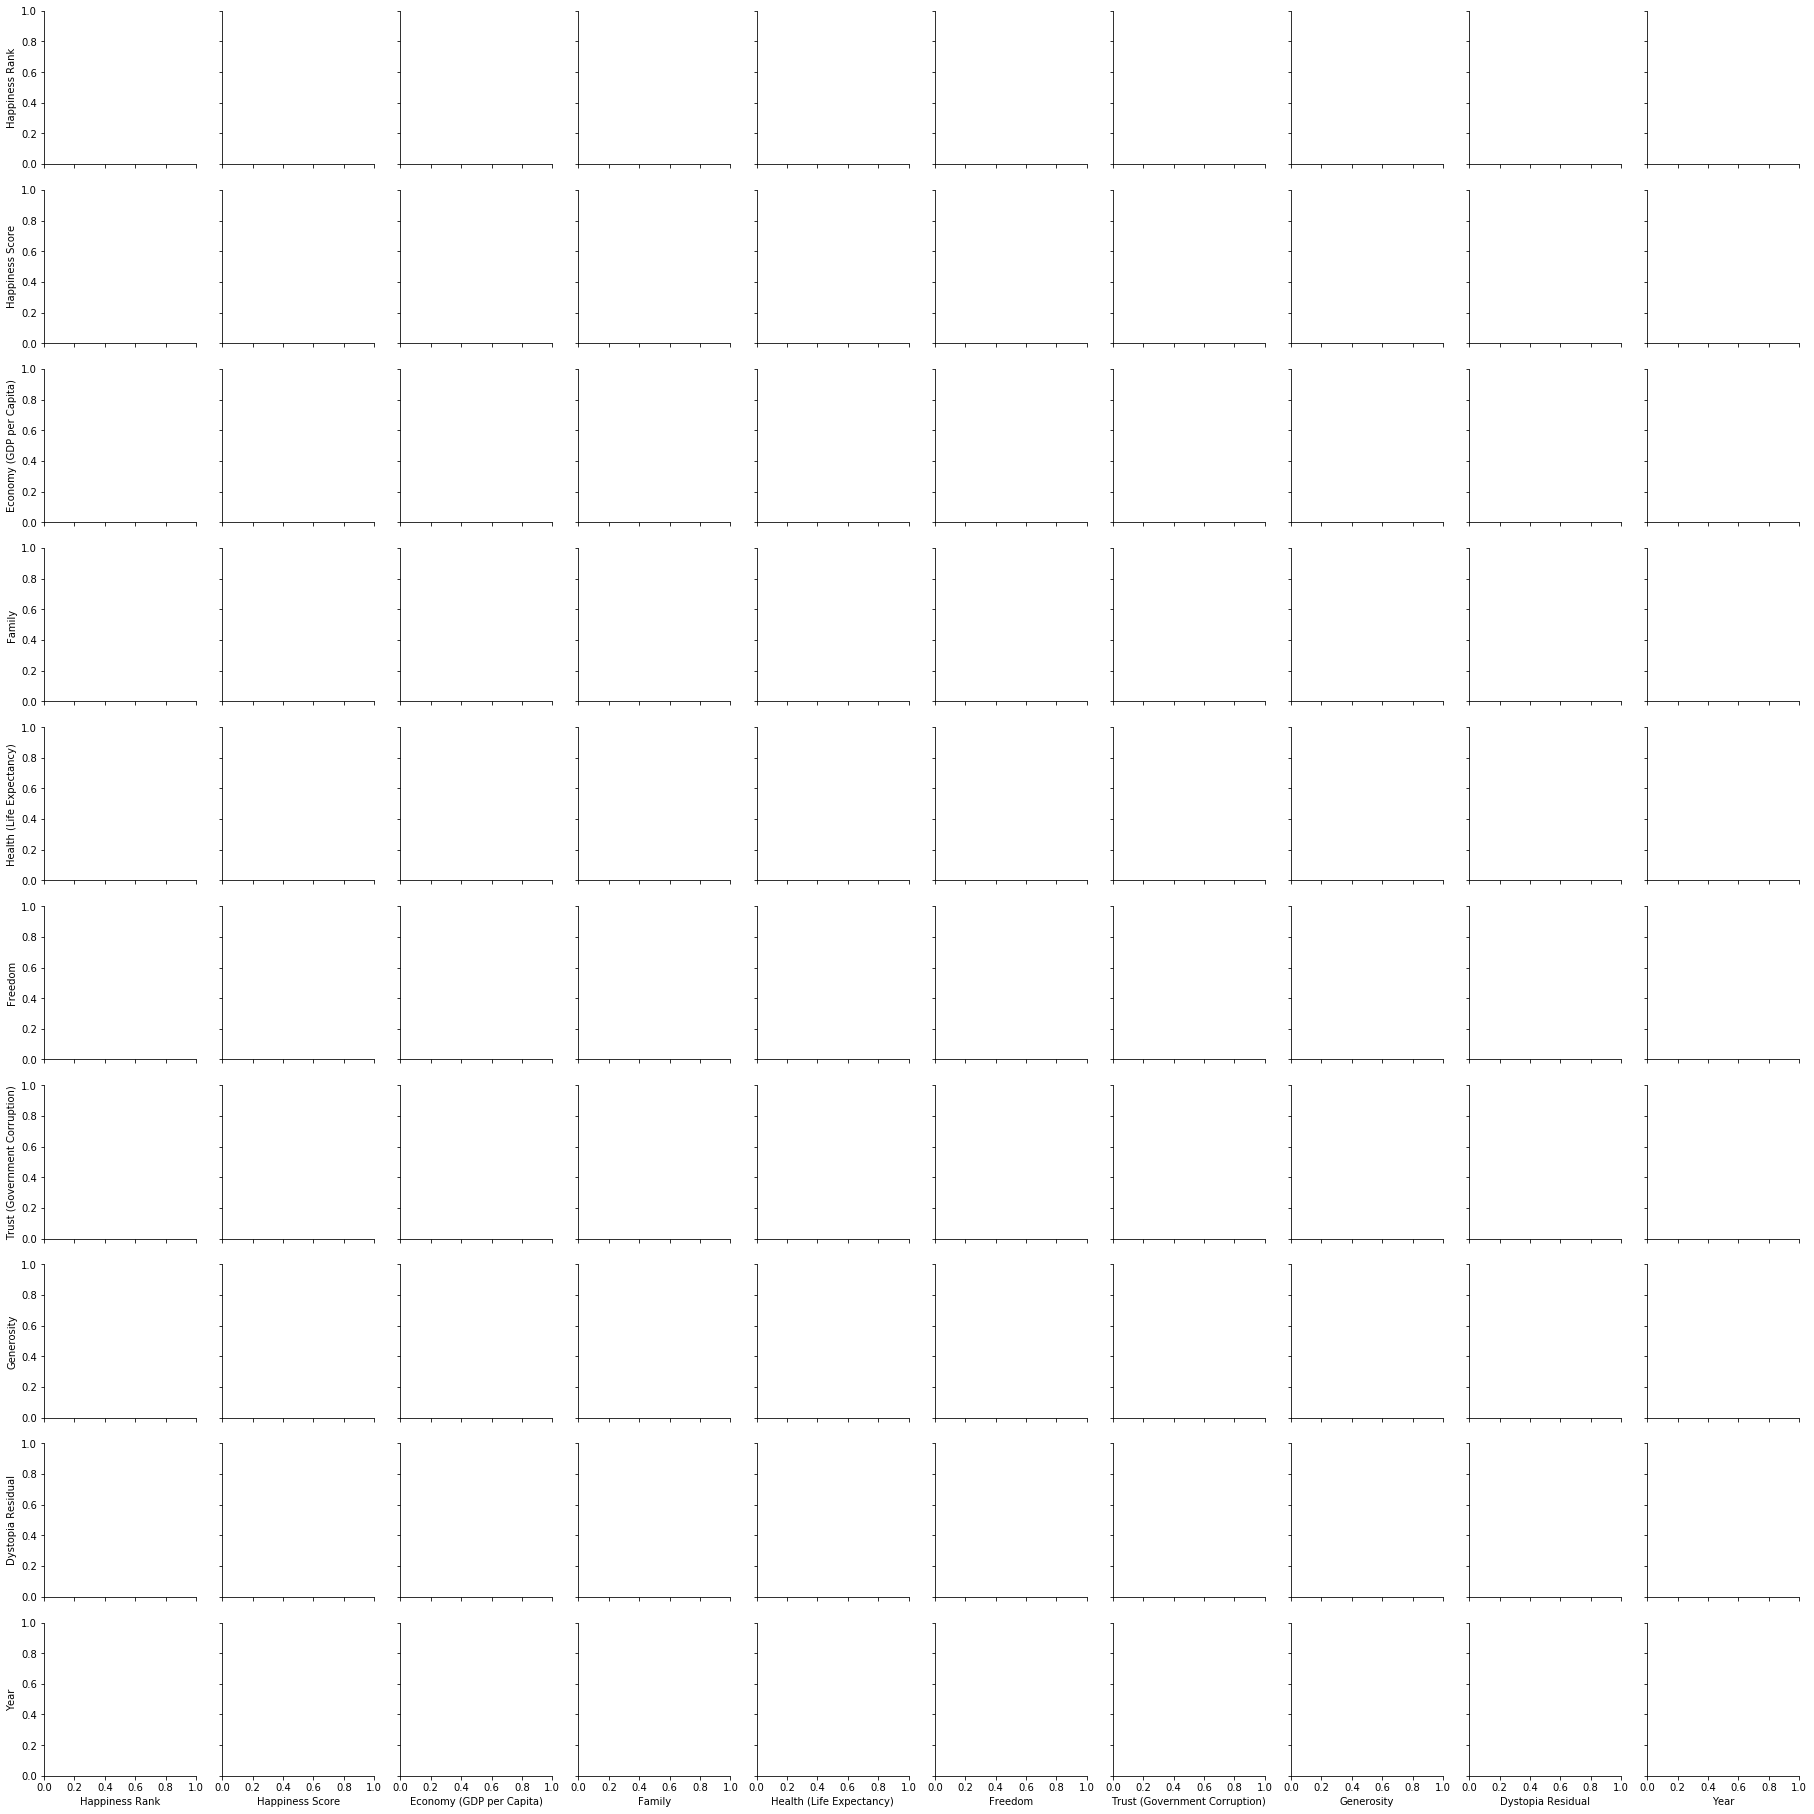

In [52]:
#your solution
graph = sns.PairGrid(data2)
graph = graph.map_diag(pd.describe)
graph = graph.map_offdiag(plt.scatter)
plt.show()

Hence, state the differences between pairplot and PairGrid.

#### Key your observations/conclusion here
